<div class="alert alert-block alert-success">
<b>Comentario general del revisor</b> <a class="tocSkip"></a><br />
Status del proyecto: <b>Aprobado</b>
</div>


¡Hola!<br />
Soy **Francisco Cortés**, estoy contento de revisar tu proyecto y ser parte de tu proceso de aprendizaje.
A lo largo del texto, haré algunas observaciones sobre mejoras en el código y también haré comentarios sobre tus percepciones sobre el tema. Si existe algún error en el código, no te preocupes, estoy aquí para ayudarte a mejorarlo, en la primera iteración te lo señalaré para que tengas la oportunidad de corregirlo, pero si aún no encuentras una solución para esta tarea, te daré una pista más precisa en la próxima iteración y también algunos ejemplos prácticos. Estaré abierto a retroalimentación y discusiones sobre el tema.<br />
Encontrarás mis comentarios a continuación - **por favor no los muevas, modifiques o borres**.
Revisaré cuidadosamente tu código para comprobar que se han cumplido con los requisitos y te proporcionaré mis comentarios en cajas verdes, amarillas o rojas como esta:

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si la ejecución fue perfecta succesfully.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existe alguna recomendación para que tu código mejore.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario del revisor</b> <a class="tocSkip"></a>

Si existen correcciones necesarias para cumplir con los requisitos. El trabajo no puede ser aceptado si hay alguna caja roja.
</div>

Puedes responderme de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta del estudiante.</b> <a class="tocSkip"></a>
</div>


# ¡Llena ese carrito!

# Introducción

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y Door Dash.
El conjunto de datos que te hemos proporcionado tiene modificaciones del original. Redujimos el tamaño del conjunto para que tus cálculos se hicieran más rápido e introdujimos valores ausentes y duplicados. Tuvimos cuidado de conservar las distribuciones de los datos originales cuando hicimos los cambios.

Debes completar tres pasos. Para cada uno de ellos, escribe una breve introducción que refleje con claridad cómo pretendes resolver cada paso, y escribe párrafos explicatorios que justifiquen tus decisiones al tiempo que avanzas en tu solución.  También escribe una conclusión que resuma tus hallazgos y elecciones.


## Diccionario de datos

Hay cinco tablas en el conjunto de datos, y tendrás que usarlas todas para hacer el preprocesamiento de datos y el análisis exploratorio de datos. A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

# Paso 1. Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Escribe aquí tu plan de solución para el Paso 1. Descripción de los datos.

Primero es necesario cargar los archivos y mostrarlos para conocer las caractertisticas que tienen, que tipo de informacion presentan y saber si los formatos utilizados son correctos, una vez realizado esto, se puede determinar si es necesario un procesamiento previo al analisis, o si puede ser analizado en el estado actual.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
#importamos las librerias necesarias tanto para la lectura y procesamiento de los datos, como para su representacion grafica

In [3]:
instacart_orders = pd.read_csv("/datasets/instacart_orders.csv", sep=";")
products = pd.read_csv("/datasets/products.csv", sep=";")
aisles = pd.read_csv("/datasets/aisles.csv", sep=";")
departments = pd.read_csv("/datasets/order_products.csv", sep=";")
order_products = pd.read_csv("/datasets/order_products.csv", sep=";")

# leer conjuntos de datos en los DataFrames

In [4]:
instacart_orders.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [5]:
products.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [6]:
aisles.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [8]:
order_products.info(show_counts=True)
# mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Non-Null Count    Dtype  
---  ------             --------------    -----  
 0   order_id           4545007 non-null  int64  
 1   product_id         4545007 non-null  int64  
 2   add_to_cart_order  4544171 non-null  float64
 3   reordered          4545007 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de leer los datos y buenas observaciones iniciales.<br/>
    

</div>


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 1. Descripción de los datos.

Primero al hacer una primera lectura de los documentos notamos que los separadores de informacion eran signod de punto y coma (";") por lo que tuvimos que hacer un ajuste al momento de indicar parametros para que las tablas se generaran de manera correcta, asi mismo se aprecia que existen valores vacios/nulos dentro de las tablas, por lo que lo primero que debemos hacer es poder estandarisar estos valores y asegurarnos de que todas las casillas tienen un valor para no tener problemas en el analisis posterior.

Como resumen rapido podemos determinar que:
Hay registro de 478967 pedidos en aplicacion (instacart)
Hay registro de 49694 productos disponibles para comprar(product)
Hay registro de 134 categorias de pasillos (aisle)
Hay registro de 4545007 departamentos (departments)
Hay registro de 4545007 articulos en pedidos (order_products)



# Paso 2. Preprocesamiento de los datos

Preprocesa los datos de la siguiente manera:

- Verifica y corrige los tipos de datos (por ejemplo, asegúrate de que las columnas de ID sean números enteros).
- Identifica y completa los valores ausentes.
- Identifica y elimina los valores duplicados.

Asegúrate de explicar qué tipos de valores ausentes y duplicados encontraste, cómo los completaste o eliminaste y por qué usaste esos métodos. ¿Por qué crees que estos valores ausentes y duplicados pueden haber estado presentes en el conjunto de datos?

## Plan de solución

Escribe aquí tu plan para el Paso 2. Preprocesamiento de los datos.
Debemos determinar que no existan valores duplicados total ni parcialmente antes de poder seguir avanzando, ya que esto podria arrojar analisis poco certeros

## Encuentra y elimina los valores duplicados (y describe cómo tomaste tus decisiones).

### `orders` data frame

In [9]:
# Revisa si hay pedidos duplicados
print(instacart_orders[instacart_orders.duplicated()].sort_values("order_id"))
print("El numero de filas repetidas es de ",instacart_orders.duplicated().sum())

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
371905    391768    57671            19          3                  2   
321100    408114    68324             4          3                  2   
394347    467134    63189            21          3                  2   
145574    794638    50898            24          3                  2   
311713   1021560    53767             3          3                  2   
273805   1112182   202304            84          3                  2   
411408   1286742   183220            48          3                  2   
266232   1782114   106752             1          3                  2   
230807   1918001   188546            14          3                  2   
323900   1919531   191501            32          3                  2   
441599   2125197    14050            48          3                  2   
223105   2160484   107525            16          3                  2   
345917   2232988    82565             1          3 

¿Tienes líneas duplicadas? Si sí, ¿qué tienen en común?
todas estan realizadas el mismo dia a la misma hora (miercoles a las 2) 

In [10]:
# Basándote en tus hallazgos,
# Verifica todos los pedidos que se hicieron el miércoles a las 2:00 a.m.
instacart_orders[(instacart_orders["order_hour_of_day"] == 2) & (instacart_orders["order_dow"]==3)].sort_values("order_id")


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
452265,191,176417,44,3,2,6.0
468324,222962,54979,59,3,2,3.0
247867,238782,196224,6,3,2,3.0
417106,248760,204961,25,3,2,15.0
328565,264348,34806,6,3,2,5.0
...,...,...,...,...,...,...
97378,3226444,149996,3,3,2,23.0
416198,3275652,169225,7,3,2,30.0
415975,3286161,77320,9,3,2,8.0
457013,3384021,14881,6,3,2,30.0


¿Qué sugiere este resultado?
El error al procesar el pedido y duplicarlo no es cuestion exclusiva de la hora y el dia ya que hay mas pedidos realizados bajo las mismas condiciones y no presentan esta situacion, hablamos de 15 pedidos duplicados contra un total de 121 pedidos hechos 

In [11]:
# Elimina los pedidos duplicados
instacart_orders.drop_duplicates(inplace=True)

In [12]:
# Vuelve a verificar si hay filas duplicadas
instacart_orders.duplicated().sum()

0

In [13]:
# Vuelve a verificar únicamente si hay IDs duplicados de pedidos
instacart_orders['order_id'].duplicated().sum()

0

Describe brevemente tus hallazgos y lo que hiciste con ellos

Pudimos comprobar que existian registros de pedidos duplicados y todos estos eran realizados el mismo dia a la misma hora, aunque esto no es un sintoma total de duplicacion ya que hay mas pedidos que son realizados bajo condiciones similares y no sufren alteracion, por el momento pudimos eliminar todos estos datos duplicados para poder proseguir con el analisis ya que el motivo de la duplicacion no es lo primordial en este proyecto

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los duplicados fueron eliminados correctamente
</div>


### `products` data frame

In [14]:
# Verifica si hay filas totalmente duplicadas
print("Hay un total de", products.duplicated().sum(),"filas duplicadas")

Hay un total de 0 filas duplicadas


In [15]:
#Revisa únicamente si hay ID de departamentos duplicados
#utilice un metodo distinto de la parte de arriba solo para corroborar que es posible utilizar varias sintaxis y llegar al mismo resultado
print("Existen", products["department_id"].duplicated().sum(), "valores repetidos de ID, teniendo en total", products["department_id"].nunique(), "ID de departamento unicos" )

Existen 49673 valores repetidos de ID, teniendo en total 21 ID de departamento unicos


In [16]:
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)
products["product_name"]=products["product_name"].str.upper()
print("Hay un total de", products["product_name"].duplicated().sum(), "nombres de productos duplicados")


Hay un total de 1361 nombres de productos duplicados


In [17]:
# Revisa si hay nombres duplicados de productos no faltantes
print("Hay un total de", products["product_name"].dropna().duplicated().sum(),"nombres de productos duplicados, una vez que se elimninan todas las celdas con valores'NaN'")

Hay un total de 104 nombres de productos duplicados, una vez que se elimninan todas las celdas con valores'NaN'


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Los datos han sido revisados apropiadamente
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Tenemos 21 departamentos entre los cuales distribuir nuestros productos para comodidad del comprador, pero nos encontramos con que 1247 productos no tienen un nombre de identificacion, lo que reduce la cantidad de informacion que podemos obtener del dataframe, es necesario a la brevedad llenar esos espacios en blanco para asegurar que la informacion obtenida de analisis posteriores sea certera

### `departments` data frame

In [18]:
# Revisa si hay filas totalmente duplicadas
print("Hay un total de", products.duplicated().sum(),"filas duplicadas")

Hay un total de 0 filas duplicadas


In [19]:
# Revisa únicamente si hay IDs duplicadas de productos
print("Existen", products["product_id"].duplicated().sum(), "valores repetidos de ID, teniendo en total", products["product_id"].nunique(), "ID de productos unicos" )

Existen 0 valores repetidos de ID, teniendo en total 49694 ID de productos unicos


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Para este caso podemos notar que tanto los departamentos como los id de productos estan correctamente identificados por ID, es necesario reforzar esta informacion con el nombre de cada uno de los productos para no dejar espacio a omisiones al momento de hacer evaluaciones de ventas o simplemente hacer busquedas por nombre de un producto especifico

### `aisles` data frame

In [20]:
# Revisa si hay filas totalmente duplicadas
print("Hay un total de", aisles.duplicated().sum(),"filas duplicadas")

Hay un total de 0 filas duplicadas


In [21]:
print("Existen", aisles["aisle_id"].duplicated().sum(), "valores repetidos de ID, teniendo en total", aisles["aisle_id"].nunique(), "ID de pasillos unicos" )

Existen 0 valores repetidos de ID, teniendo en total 134 ID de pasillos unicos


Describe brevemente tus hallazgos y lo que hiciste con ellos.

contamos con 134 pasillos para realizar la busqueda de nuestro producto 

### `order_products` data frame

In [22]:
# Revisa si hay filas totalmente duplicadas
print("Hay un total de", order_products.duplicated().sum(),"filas duplicadas")

Hay un total de 0 filas duplicadas


In [23]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
order_products[order_products["reordered"].duplicated()].sort_values("order_id")

,order_id,product_id,add_to_cart_order,reordered
1169276,4,27761,4.0,1
2834230,4,26434,2.0,1
3977678,4,21351,6.0,1
2502556,4,41276,13.0,1
3189411,4,25146,11.0,1
...,...,...,...,...
4417991,3421077,45007,2.0,0
4000108,3421077,27845,4.0,0
1505667,3421077,27966,1.0,0
719972,3421077,26940,3.0,0


Describe brevemente tus hallazgos y lo que hiciste con ellos

Aunque textualmente en el DataFrame no nos indique que hay valores repetidos, en este caso particular debemos tener en cuenta y tener mucho cuidado con aquellos valores que cuentan con una "reorden" ya que significa que la misma compra ha sido realizada una vez mas bajo las mismas condiciones, es decir, el mismo usuario, el mismo producto y la misma cantidad, esto si es representativo en analisis posteriores y omitirlos puede tener un impacto importante

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Estos últimos dataframes no cuentan con filas totalmente duplicadas.

</div


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [24]:
# Encuentra los valores ausentes en la columna 'product_name'
products[products["product_name"].isna()]

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


Describe brevemente cuáles son tus hallazgos.

Hay muchos valores ausentes en el nombre del producto y todos coinciden en el mismo pasillo y el mismo departamente, esto como observacion rapida pudiera indicar que es una seccion recien agregada y no ha terminado de ser alimentada

In [25]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
products[(products["product_name"].isna()) & (products["aisle_id"] != 100)].sum()



product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

Describe brevemente cuáles son tus hallazgos.

Hay una clara relacion entre los nombres ausentes y el pasillo 100, al filtrar no existen valores nulos fuera del pasillo 100

In [26]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
products[(products["product_name"].isna()) & (products["department_id"] != 21)].sum()


product_id       0.0
product_name     0.0
aisle_id         0.0
department_id    0.0
dtype: float64

Describe brevemente cuáles son tus hallazgos.
Hay una clara relacion entre los nombres ausentes y el departamento 21, al filtrar no existen valores nulos fuera del pasillo 100

In [27]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
products[(products["department_id"] ==21) & (products["aisle_id"]==100)].count()

product_id       1258
product_name        0
aisle_id         1258
department_id    1258
dtype: int64

Describe brevemente cuáles son tus hallazgos.

simplemente se confirma la informacion mencionada en los apartados anteriores, existe una relacion directa entre el pasillo 100, el departamento 21 y los productos que tienen nombres nulos, un total de 1258 productos se encuentran en esta situacion

In [28]:
# Completa los nombres de productos ausentes con 'Unknown'
products["product_name"].fillna("Unknown", inplace=True)


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Los valores nulos no son de gran utilidad en un analisis, es mejor reemplazarlos por un valor que nos ayude a identificar mas facil la informacion, en este caso se opta por "Unknown" que es desconocido, ya que no se conoce el nombre pero si se tiene los demas valores, asi al aplicar un filtro sobre el valor "Unknown" accederemos de manera mas sencilla que filtrando valores vacios o nulos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


### `orders` data frame

In [29]:

instacart_orders.isna().sum()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

In [30]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
#No hay ningun valor ausente de ordenes, unicamente hay valores nulos en el numero de dias que existen entre un pedido y otro

Describe brevemente tus hallazgos y lo que hiciste con ellos.
No existe ningun valor ausente dentro de los pedidos, los valores nulos obtenidos en la columna de dias de diferencia entre pedidos nos muestra el numero de clientes que han realizado un pedido pero no han vuelto a hacer uno nuevo

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>

Te dejo un ejemplo debajo de la manera en que se puede revisar este ejercicio
</div>


In [35]:
# ¿Hay algún valor ausente que no sea el primer pedido del cliente?
missing_values_not_first_order = instacart_orders[instacart_orders['order_number'] > 1]['order_number'].isnull().sum()

print(missing_values_not_first_order)

0


### `order_products` data frame

In [31]:
# Encuentra los valores ausentes
order_products.isna().sum()


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64

In [32]:
# ¿Cuáles son los valores mínimos y máximos en esta columna?
print("El minimo es",order_products["add_to_cart_order"].min())
print("El maximo es",order_products["add_to_cart_order"].max())

El minimo es 1.0
El maximo es 64.0


Describe brevemente cuáles son tus hallazgos.
Las ordenes van desde un solo producto hasta un maximo de 64 productos por pedido unico

In [33]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'
order_products[order_products["add_to_cart_order"].isna()]["order_id"]


737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

In [34]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?
#No, los pedidos con valores ausentes no tienen ningun producto porque los valores ausentes solamente se encuentran en esta columna

# Agrupa todos los pedidos con datos ausentes por su ID de pedido.
missing_data = order_products[order_products.isna().any(axis=1)]
grouped_data=missing_data.groupby("product_id")

# Cuenta el número de 'product_id' en cada pedido y revisa el valor mínimo del conteo.
product_count= order_products.groupby('order_id')['product_id'].count()
product_count.head()
# Obtener el valor mínimo del conteo
product_count.min()
#product_count.max()

1

In [38]:
missing_data['order_id']

737        2449164
9926       1968313
14394      2926893
16418      1717990
30114      1959075
            ...   
4505662    1800005
4511400    1633337
4517562     404157
4534112    1673227
4535739    1832957
Name: order_id, Length: 836, dtype: int64

<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!<br/>
    
El valor minimo para ordenes que tienen valores nulos es `65`, te dejo el código en la celda de abajo
</div>


In [39]:
# Código del revisor
order_products[order_products['order_id'].isin(missing_data['order_id'])].groupby('order_id')['product_id'].count().min()

65

Describe brevemente cuáles son tus hallazgos.
Estamos agrupando los productos por pedido y buscando el minimo estamos encontrando que el pedido mas pequeño contiene solamente un producto

In [40]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
order_products["add_to_cart_order"].fillna("999", inplace=True)
order_products["add_to_cart_order"] = order_products["add_to_cart_order"].astype(int)
order_products.info()
order_products[order_products["add_to_cart_order"]==999]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype
---  ------             -----
 0   order_id           int64
 1   product_id         int64
 2   add_to_cart_order  int64
 3   reordered          int64
dtypes: int64(4)
memory usage: 138.7 MB


,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,999,0
9926,1968313,43867,999,0
14394,2926893,11688,999,0
16418,1717990,4142,999,0
30114,1959075,42828,999,1
...,...,...,...,...
4505662,1800005,7411,999,0
4511400,1633337,260,999,0
4517562,404157,9517,999,0
4534112,1673227,17835,999,0


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
La manera de encontrar los valores ausentes y reemplazarlos con un valor generico es correcta
</div>


Describe brevemente tus hallazgos y lo que hiciste con ellos.

Aunque aparentemente no estamos teniendo ningun cambio en la informacion al cambiar los datos de Float a Int, es necesario para despues omitir errores que pudieran involucrar fracciones de numeros, ademas de haber agrupado las ordenes por el numero de productos nos permite conocer que tanto varia la cantidad de productos que solicitan las personas encontrando que piden desde un solo articulo hasta 127

## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos

A pesar de ser pocas las columnas de informacion que estamos evaluando, la correlacion que tienen unas tablas con otras es importante ya que en este caso particular nos permitio encontrar que tanta diferencia hay entre un pedido y otro, tambien encontramos un area donde pareciera que la alimentacion de informacion del sistema es insuficiente y pudieramos llegar a determinar que se trata de un area nueva que aun no esta terminada, pero es necesario terminarla cuanto antes para no tener omisiones de informacion, ademas de que podemos encontrar patrones de compra si evaluamos los dias y las horas comparados con el volumen de compra de los clientes

# Paso 3. Análisis de los datos

Una vez los datos estén procesados y listos, haz el siguiente análisis:

# [A] Fácil (deben completarse todos para aprobar)

1. Verifica que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` en la tabla orders sean razonables (es decir, `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` oscile entre 0 y 6).
2. Crea un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crea un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crea un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### [A1] Verifica que los valores sean sensibles

In [41]:
sorted(instacart_orders["order_hour_of_day"].unique())


[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23]

In [42]:
sorted(instacart_orders["order_dow"].unique())


[0, 1, 2, 3, 4, 5, 6]

Escribe aquí tus conclusiones
Los dias de la semana y las horas del dia estan bien ubicados entre los valores correctos

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>
Se verificó que los datos sean sensibles correctamente
</div>


### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

In [43]:
instacart_orders.groupby("order_hour_of_day")["user_id"].nunique()
   

order_hour_of_day
0      2991
1      1671
2       958
3       744
4       735
5      1281
6      3757
7     10993
8     20268
9     28112
10    32195
11    32660
12    31754
13    32433
14    32797
15    32894
16    31579
17    26825
18    21795
19    17026
20    12891
21     9806
22     7670
23     5167
Name: user_id, dtype: int64

Escribe aquí tus conclusiones
Entre las 10 de la mañana y las 4 de la tarde es donde se presenta un mayor numero de compras

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!<br/>

Los clientes hacen más ordenes durante el mediodía
</div>


### [A3] ¿Qué día de la semana compran víveres las personas?

In [44]:
instacart_orders.groupby("order_dow")["user_id"].count()

order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: user_id, dtype: int64

Escribe aquí tus conclusiones
Los dias domingo y lunes son los dias con mas ventas en la tienda

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Los domingos son los días preferidos de los clientes
</div>


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

In [45]:
print("El tiempo promedio de espera entre compras es",instacart_orders["days_since_prior_order"].mean(),"dias")
print("El tiempo minimo de espera entre compras es", instacart_orders["days_since_prior_order"].min(),"dias")
print("El tiempo maximo de espera entre compras es", instacart_orders["days_since_prior_order"].max(),"dias")

El tiempo promedio de espera entre compras es 11.101813900274362 dias
El tiempo minimo de espera entre compras es 0.0 dias
El tiempo maximo de espera entre compras es 30.0 dias


Escribe aquí tus conclusiones
El tiempo promedio de compra es de 11 dias, pero lo importante es los tiempos maximos y minimos, el minimo nos indica que hay personas que diariamente hacen sus compras, indicando que no tienen un almacen en casa, mientras que hay personas que suelen hacer sus compras grandes una vez al mes, con la intencion de no estar realizando muchas compras y hacerlo en una sola tanda

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>

Buena manera de mostrar los datos relevantes, en este caso recomendaría mostrar los datos en una grafica ya que hay cosas interesantes que no se pueden ver a simple vista con los números unicamente, te dejo el ejemplo de un histograma
</div>


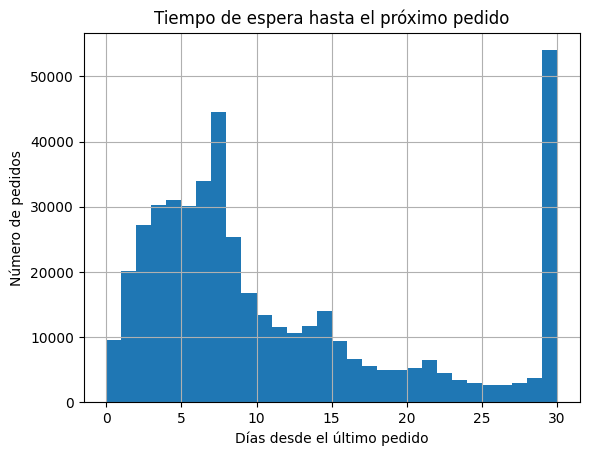

In [46]:
instacart_orders['days_since_prior_order'].hist(bins=30)
plt.xlabel('Días desde el último pedido')
plt.ylabel('Número de pedidos')
plt.title('Tiempo de espera hasta el próximo pedido')
plt.show()

# [B] Intermedio (deben completarse todos para aprobar)

1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Traza gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describe las diferencias que observes.
2. Grafica la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. ¿Cuáles son los 20 principales productos que se piden con más frecuencia (muestra su identificación y nombre)?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Traza gráficos de barra para los dos días y describe las diferencias que veas.

In [47]:
ventas_miercoles=instacart_orders[instacart_orders["order_dow"]==3]
ventas_sabados=instacart_orders[instacart_orders["order_dow"]==6]

#filtramos las ventas por dia

conteo_miercoles=ventas_miercoles.groupby("order_hour_of_day")["user_id"].nunique()
conteo_sabado=ventas_sabados.groupby("order_hour_of_day")["user_id"].nunique()

#Hacemos el conteo de ventas en cada hora para cada dia

<AxesSubplot:title={'center':'Compras por hora los miercoles'}, xlabel='Horas del dia (formato 24 horas)', ylabel='Numero de compras'>

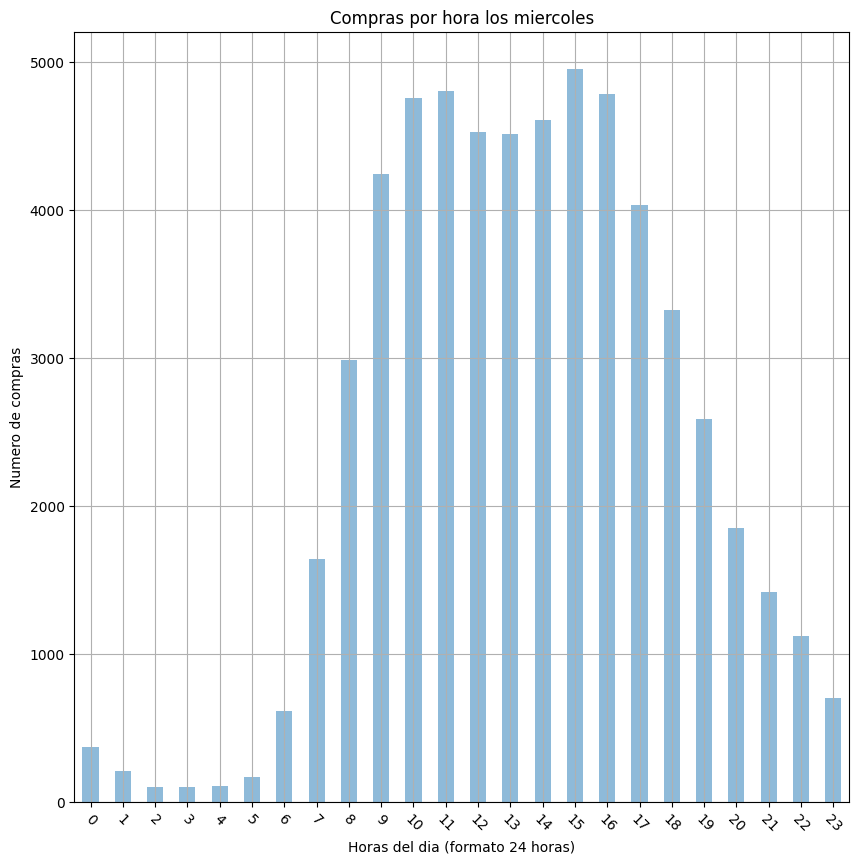

In [48]:
conteo_miercoles.plot(x="order_hour_of_day", 
                      y="user_id", 
                      kind="bar",
                      alpha=0.5,
                      title="Compras por hora los miercoles",
                      figsize=[10,10],
                      xlabel="Horas del dia (formato 24 horas)",
                      ylabel="Numero de compras",
                      grid=True,
                      rot=315)

<AxesSubplot:title={'center':'Compras por hora los sabados'}, xlabel='Horas del dia (formato 24 horas)', ylabel='Numero de compras'>

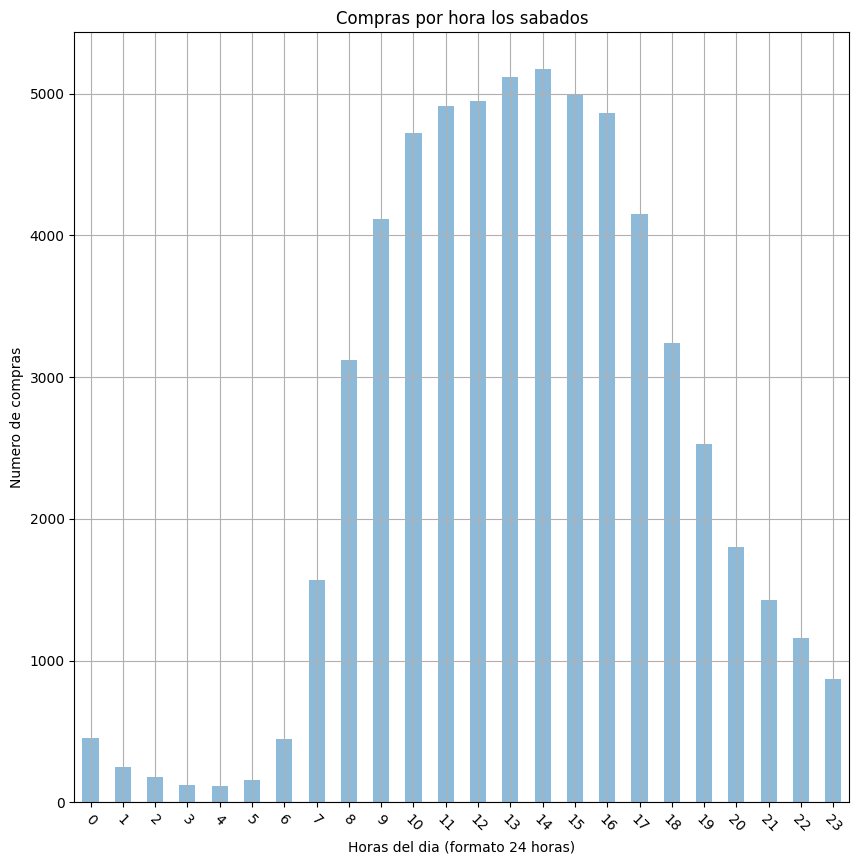

In [49]:
conteo_sabado.plot(x="order_hour_of_day", 
                      y="user_id", 
                      kind="bar",
                      alpha=0.5,
                      title="Compras por hora los sabados",
                      figsize=[10,10],
                      xlabel="Horas del dia (formato 24 horas)",
                      ylabel="Numero de compras",
                      grid=True,
                      rot=315)

Escribe aquí tus conclusiones
Los fines de semana la actividad se vuelve un poco mas tardia que la actividad entre semana

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho!
<br />
Buena manera de mostrar los resultados de ambos días, te dejo el ejemplo de como mostrarlos en una misma grafica
</div>


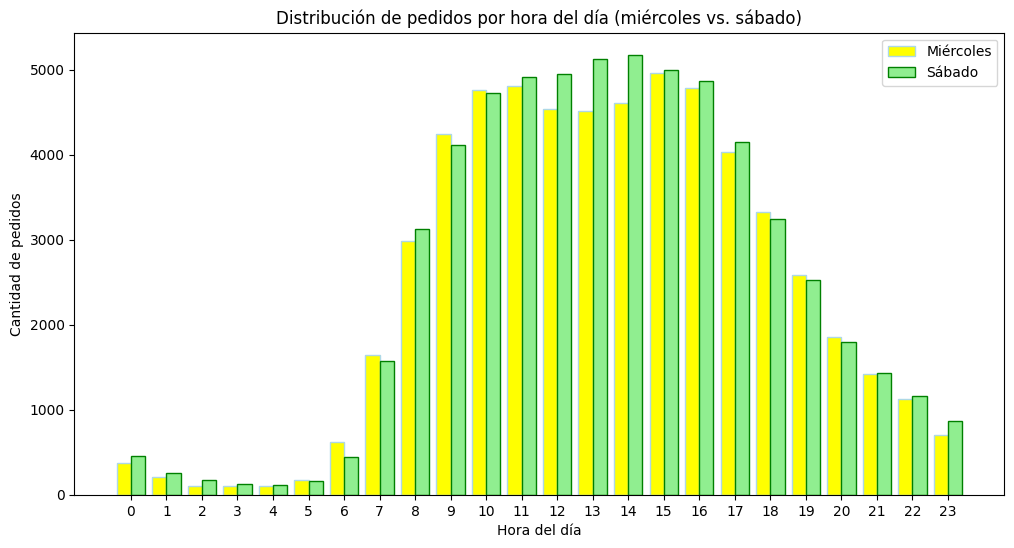

In [57]:
plt.figure(figsize=(12, 6))
plt.bar(conteo_miercoles.index - 0.2, conteo_miercoles.values, width=0.4, label='Miércoles', color = 'yellow', edgecolor = 'lightblue')
plt.bar(conteo_sabado.index + 0.2, conteo_sabado.values, width=0.4, label='Sábado', color = 'lightgreen', edgecolor = 'green')
plt.xlabel('Hora del día')
plt.ylabel('Cantidad de pedidos')
plt.title('Distribución de pedidos por hora del día (miércoles vs. sábado)')
plt.xticks(range(24))
plt.legend()
plt.show()

### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

In [58]:
pedidos_cliente=instacart_orders.merge(order_products, how="left", on="order_id")
pedidos_cliente

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30.0,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30.0,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30.0,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30.0,24363.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
4573908,2071924,1730,18,1,14,15.0,1503.0,17.0,0.0
4573909,2071924,1730,18,1,14,15.0,4778.0,12.0,1.0
4573910,2071924,1730,18,1,14,15.0,11512.0,1.0,1.0
4573911,2071924,1730,18,1,14,15.0,4920.0,6.0,1.0


In [59]:
resumen_pedidos=pedidos_cliente.groupby("user_id")["order_id"].count().reset_index()
resumen_pedidos.columns=["user_id","Numero_pedidos"]
resumen_pedidos

,user_id,Numero_pedidos
0,2,26
1,4,3
2,5,12
3,6,5
4,7,14
...,...,...
157432,206203,27
157433,206206,21
157434,206207,46
157435,206208,125


Escribe aquí tus conclusiones


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/> 

Has hecho una buena agrupación de los datos, en este caso también recomendaría hacer una gráfica que nos muestre la tendencia de los usuarios

</div>


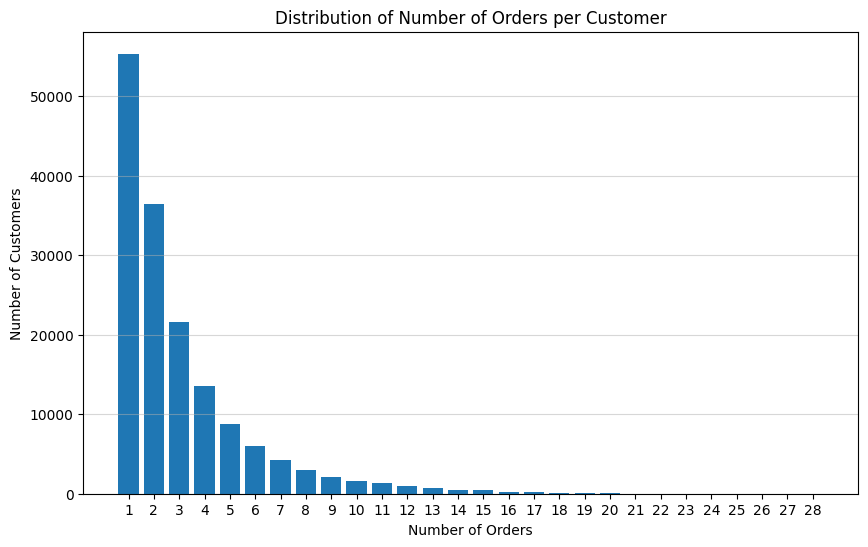

In [63]:
order_counts = instacart_orders['user_id'].value_counts()
plt.figure(figsize=(10, 6))
plt.hist(order_counts, bins=range(1, order_counts.max() + 2), align='left', rwidth=0.8)
plt.xlabel('Number of Orders')
plt.ylabel('Number of Customers')
plt.title('Distribution of Number of Orders per Customer')
plt.xticks(range(1, order_counts.max() + 1))
plt.grid(axis='y', alpha=0.5)
plt.show()

### [B3] ¿Cuáles son los 20 productos más populares (muestra su ID y nombre)?

In [64]:
best_products=order_products["product_id"].value_counts().head(20)
top_products=best_products.reset_index()
top_products.columns = ['product_id', 'order_count']

top_products=top_products.merge(products,how="left", on="product_id")
top_products=top_products.drop(["aisle_id","department_id"], axis="columns")
print(top_products)



    product_id  order_count              product_name
0        24852        66050                    BANANA
1        13176        53297    BAG OF ORGANIC BANANAS
2        21137        37039      ORGANIC STRAWBERRIES
3        21903        33971      ORGANIC BABY SPINACH
4        47209        29773      ORGANIC HASS AVOCADO
5        47766        24689           ORGANIC AVOCADO
6        47626        21495               LARGE LEMON
7        16797        20018              STRAWBERRIES
8        26209        19690                     LIMES
9        27845        19600        ORGANIC WHOLE MILK
10       27966        19197       ORGANIC RASPBERRIES
11       22935        15898      ORGANIC YELLOW ONION
12       24964        15292            ORGANIC GARLIC
13       45007        14584          ORGANIC ZUCCHINI
14       39275        13879       ORGANIC BLUEBERRIES
15       49683        13675            CUCUMBER KIRBY
16       28204        12544        ORGANIC FUJI APPLE
17        5876        12232 

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Los resultados son correctos!<br/>
Los clientes tienden a comprar productos naturales, buena manera de mostrar los resultados
</div>


Escribe aquí tus conclusiones
Los productos mas consumidos por los clientes son frutas y verduras, es una poblacion muy sana con buenos habitos

# [C] Difícil (deben completarse todos para aprobar)

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

In [65]:
articulos_pedido=instacart_orders.merge(order_products, how="left", on="order_id")
articulos_pedido

,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered
0,1515936,183418,11,6,13,30.0,19048.0,1.0,1.0
1,1515936,183418,11,6,13,30.0,47766.0,3.0,1.0
2,1515936,183418,11,6,13,30.0,45066.0,9.0,0.0
3,1515936,183418,11,6,13,30.0,24082.0,11.0,0.0
4,1515936,183418,11,6,13,30.0,24363.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...
4573908,2071924,1730,18,1,14,15.0,1503.0,17.0,0.0
4573909,2071924,1730,18,1,14,15.0,4778.0,12.0,1.0
4573910,2071924,1730,18,1,14,15.0,11512.0,1.0,1.0
4573911,2071924,1730,18,1,14,15.0,4920.0,6.0,1.0


In [66]:
resumen_articulos=articulos_pedido.groupby("order_id")["add_to_cart_order"].count().reset_index()
resumen_articulos.columns=["pedido","articulos"]
resumen_articulos


,pedido,articulos
0,4,13
1,9,15
2,11,5
3,19,3
4,20,8
...,...,...
478947,3421053,9
478948,3421058,0
478949,3421071,5
478950,3421077,4


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Bien hecho, el resultado es correcto, los usuarios suelen pedir alrededor de 10 articulos
</div>


Escribe aquí tus conclusiones
hay clientes con muy pocos articulos registrados que representan ya sea un cliente no muy leal y que compra ocasionalmente solo cuando la situacion lo amerita, o que son clientes nuevos que apenas van iniciando su historial con la tienda, asi mismo hay clientes con una gran variedad de articulos en su lista, lo que representa que han confiado en la tienda en mas de una ocasion

In [76]:
### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia (muestra sus nombres e IDs de los productos)?
new_best_products=articulos_pedido["product_id"].value_counts().head(20)
top_new_products=new_best_products.reset_index()
top_new_products.columns = ['product_id', 'cantidad']

top_new_products=top_new_products.merge(products,how="left", on="product_id")
top_new_products=top_new_products.drop(["aisle_id","department_id"], axis="columns")
top_new_products



,product_id,cantidad,product_name
0,24852.0,66050,BANANA
1,13176.0,53297,BAG OF ORGANIC BANANAS
2,21137.0,37039,ORGANIC STRAWBERRIES
3,21903.0,33971,ORGANIC BABY SPINACH
4,47209.0,29773,ORGANIC HASS AVOCADO
5,47766.0,24689,ORGANIC AVOCADO
6,47626.0,21495,LARGE LEMON
7,16797.0,20018,STRAWBERRIES
8,26209.0,19690,LIMES
9,27845.0,19600,ORGANIC WHOLE MILK


<div class="alert alert-block alert-warning">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Cuidado!

Se ha usado el mismo proceso que para el ejercicio `B3`, en este caso se debía filtrar los datos por `reordered == 1`, de esta manera solo haces el conteo de los productos que sí han sido reordenados. 

Nota: no lo marco como `error` porque los ejercicios `B3` y `C5` fueron contestados correctamente y son bastante similares
</div>


Escribe aquí tus conclusiones
los productos mas populares seguiran siendo los mismos

### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [68]:
reorden= order_products.groupby("product_id")["reordered"].agg(total_orders='count',total_reorders='sum')

In [69]:
reorden["reorden_proporcional"] = reorden["total_reorders"] / reorden["total_orders"]

In [70]:
reorden =reorden.reset_index()
reorden= reorden.merge(products[['product_id', 'product_name']], on='product_id')
reorden

,product_id,total_orders,total_reorders,reorden_proporcional,product_name
0,1,280,158,0.564286,CHOCOLATE SANDWICH COOKIES
1,2,11,0,0.000000,ALL-SEASONS SALT
2,3,42,31,0.738095,ROBUST GOLDEN UNSWEETENED OOLONG TEA
3,4,49,25,0.510204,SMART ONES CLASSIC FAVORITES MINI RIGATONI WIT...
4,7,2,1,0.500000,PURE COCONUT WATER WITH ORANGE
...,...,...,...,...,...
45568,49690,5,4,0.800000,HIGH PERFORMANCE ENERGY DRINK
45569,49691,72,31,0.430556,ORIGINAL PANCAKE & WAFFLE MIX
45570,49692,12,5,0.416667,ORGANIC INSTANT OATMEAL LIGHT MAPLE BROWN SUGAR
45571,49693,25,11,0.440000,SPRING WATER BODY WASH


Escribe aquí tus conclusiones
aunque en porcentaje, las ordenes y reordenes de algunos pedidos pareciera estar equilibrada, aunque es muy notorio el consumo incrementado del chocolate sobre lo demas

### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [71]:
proporcion_reorden = order_products.groupby('order_id')['reordered'].agg(
    total_productos_pedidos="count",
    total_productos_reordenados='sum')

In [72]:
proporcion_reorden["proporcion_reorden"] = (
    proporcion_reorden['total_productos_reordenados'] / proporcion_reorden['total_productos_pedidos'])
proporcion_reorden


,total_productos_pedidos,total_productos_reordenados,proporcion_reorden
order_id,,,
4,13,12,0.923077
9,15,10,0.666667
11,5,5,1.000000
19,3,3,1.000000
20,8,0,0.000000
...,...,...,...
3421034,17,17,1.000000
3421053,9,9,1.000000
3421071,5,1,0.200000


Escribe aquí tus conclusiones
por los datos que se alcanzan a presentar, los usuarios tienden a reordenar los mismos productos, esto puede deberse a que son articulos de uso cotidiano que necesitan estar resurtiendo en su hogar, aunque tambien se presentan algunos articulos que no se reordenan, tal vez porque sean comprados en oferta y no sean realmente necesarios, o pueden ser articulos de larga duracion que no requieran ser resurtidos con una alta frecuencia

<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Buena manera de realizar las proporciones
</div>


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [73]:
primer_agregado= order_products[order_products["add_to_cart_order"] == 1]

In [74]:
top_primeros_articulos= primer_agregado["product_id"].value_counts().head(20)
top_primeros_articulos = top_primeros_articulos.reset_index()
top_primeros_articulos.columns = ['product_id', 'primer_agregado']
top_primeros_articulos

,product_id,primer_agregado
0,24852,15562
1,13176,11026
2,27845,4363
3,21137,3946
4,47209,3390
5,21903,3336
6,47766,3044
7,19660,2336
8,16797,2308
9,27966,2024


In [75]:
top_primeros_articulos= top_primeros_articulos.merge(products[['product_id', 'product_name']], on='product_id')
top_primeros_articulos

,product_id,primer_agregado,product_name
0,24852,15562,BANANA
1,13176,11026,BAG OF ORGANIC BANANAS
2,27845,4363,ORGANIC WHOLE MILK
3,21137,3946,ORGANIC STRAWBERRIES
4,47209,3390,ORGANIC HASS AVOCADO
5,21903,3336,ORGANIC BABY SPINACH
6,47766,3044,ORGANIC AVOCADO
7,19660,2336,SPRING WATER
8,16797,2308,STRAWBERRIES
9,27966,2024,ORGANIC RASPBERRIES


Escribe aquí tus conclusiones
los productos que mas se agregan en primer lugar son las frutas y verduras


<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Correcto!<br/>
Una vez más los productos orgánicos estan en el top de la lista<br/>
</div>


### Conclusion general del proyecto:

Los compradores de esta tienda siempre tienden a comprar primero frutas y verduras, y asi mismo son los productos que mas se reordenan por cliente, tambien demuestran que hay clientes que diariamente acuden a hacer sus comprar como tambien hay quienes prefieren comprar una vez al mes y almacenar en casa, tambien los usuarios tienden a hacer sus compras entre las 10 am y las 4 pm entre semana, y los fines de semana tienden a hacerlo desde las 12 del medio dia, hasta las 6 de la tarde

## Comentario general del revisor
<div class="alert alert-block alert-success">
<b>Comentario del revisor</b> <a class="tocSkip"></a><br />
Has realizado un buen trabajo, me doy cuenta de que has aplicado los conocimientos que has adquirido durante el curso, las conclusiones a las que llegaste son buenas y los procedimientos realizados son correctos. Considero que este es un proyecto que se empieza a asemejar más a algún proyecto que te pidan en un trabajo, a partir de análisis de este tipo se pueden diseñar estrategias de marketing específicas para ciertos productos o se pueden optimizar los procesos internos para tener disponibles más rápidamente los productos que se venden más seguido.<br/>

    
Continúa con el buen trabajo y mucho éxito en el siguiente Sprint!
</div>
